### Importing libraries

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import TensorDataset, DataLoader

import os
from PIL import Image 
from IPython.display import display #Only for Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')
device= torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "/content/drive/MyDrive/CATS_DOGS.zip" .
!unzip -q "CATS_DOGS.zip"
!rm "CATS_DOGS.zip"

replace CATS_DOGS/test/CAT/10000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
path = '/content/CATS_DOGS'

### Some examples from dataset

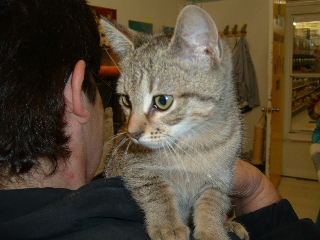

The image size is (320, 240)
The pixel value at the coordinates 0,0 of the above image is (11, 10, 8)


In [ ]:
with Image.open(f'{path}/train/CAT/4473.jpg') as im: 
    display (im)
    print(f'The image size is {im.size}') 
    print(f'The pixel value at the coordinates 0,0 of the above image is {im.getpixel((0,0))}')
 

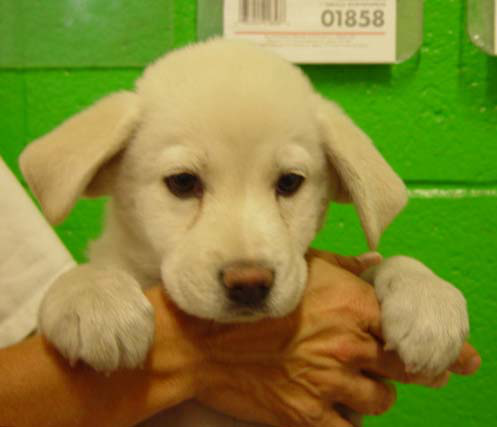

The image size is (497, 427)


In [ ]:
with Image.open(f'{path}/train/DOG/481.jpg') as im:
    display (im)
    print(f'The image size is {im.size}') #to know the size of the image

In [ ]:
img_names= []

for folder,subfolder,filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)

In [ ]:
len(img_names)  #total number of images in the list

24994

In [ ]:
img_names[0:10]

['/content/CATS_DOGS/train/DOG/2151.jpg',
 '/content/CATS_DOGS/train/DOG/8603.jpg',
 '/content/CATS_DOGS/train/DOG/3933.jpg',
 '/content/CATS_DOGS/train/DOG/3274.jpg',
 '/content/CATS_DOGS/train/DOG/2026.jpg',
 '/content/CATS_DOGS/train/DOG/1306.jpg',
 '/content/CATS_DOGS/train/DOG/6073.jpg',
 '/content/CATS_DOGS/train/DOG/5769.jpg',
 '/content/CATS_DOGS/train/DOG/8594.jpg',
 '/content/CATS_DOGS/train/DOG/5240.jpg']

In [ ]:
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
            
    except:
        rejected.append(item)

In [ ]:
len(img_sizes)

24994

In [ ]:
df= pd.DataFrame(img_sizes,columns=['width','height'])
df.head()

,width,height
0,500,375
1,500,375
2,500,375
3,500,485
4,450,500


In [ ]:
df.describe()

,width,height
count,24994.000000,24994.000000
mean,404.493518,361.037129
std,108.941802,96.936811
min,42.000000,33.000000
25%,323.000000,302.000000
50%,448.000000,375.000000
75%,500.000000,421.000000
max,500.000000,500.000000


### Loading dataset (with transformation)

In [ ]:
from torchvision import datasets, transforms

In [ ]:
# Train data transformation
train_transform =transforms.Compose( [
    transforms.RandomHorizontalFlip(),       
    transforms.RandomRotation(degrees = 30),  
    transforms.Resize( (224)),               
    transforms.CenterCrop(224) ,                 
    transforms.ToTensor(),                     
    transforms.Normalize( [0.485,0.456,0.406],[0.229,0.224,0.225]) 

] )

In [ ]:
# Test data transformation
test_transform =transforms.Compose( [
    transforms.Resize( (224)),                
    transforms.CenterCrop(224) ,                
    transforms.ToTensor(),                    
    transforms.Normalize( [0.485,0.456,0.406],[0.229,0.224,0.225]) 

] )

In [ ]:
root = path

In [ ]:
train_data = datasets.ImageFolder(os.path.join(root,'train'),transform= train_transform)
test_data  = datasets.ImageFolder(os.path.join(root,'test'),transform = test_transform)

In [ ]:
train_data

Dataset ImageFolder
    Number of datapoints: 18743
    Root location: /content/CATS_DOGS/train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               Resize(size=224, interpolation=bilinear)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
print(type(train_data))
print(len(train_data))

<class 'torchvision.datasets.folder.ImageFolder'>
18743


In [ ]:
test_data

Dataset ImageFolder
    Number of datapoints: 6251
    Root location: /content/CATS_DOGS/test
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
image, label = train_data[0]
print('Shape:', image.shape, '\nLabel:', label)

Shape: torch.Size([3, 224, 224]) 
Label: 0


In [ ]:
image, label = test_data[0]
print('Shape:', image.shape, '\nLabel:', label)

Shape: torch.Size([3, 224, 224]) 
Label: 0


In [ ]:
class_names= train_data.classes 
class_names

['CAT', 'DOG']

In [ ]:
torch.manual_seed(101)
bat_sz=10
train_loader = DataLoader(train_data,batch_size=bat_sz,shuffle=True)  
test_loader = DataLoader(test_data,batch_size=bat_sz,shuffle=False)   

Label: [    1     1     0     1     0     0     0     1     0     0]
Class:  DOG DOG CAT DOG CAT CAT CAT DOG CAT CAT


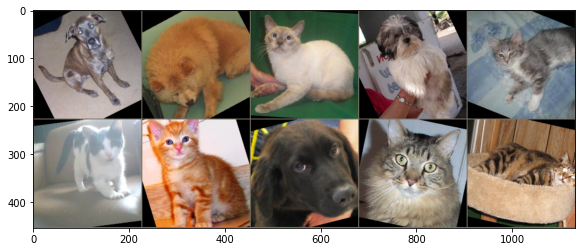

In [ ]:
# Some examples from transformed dataset
np.set_printoptions(formatter=dict(int=lambda x: f'{x:5}')) 
from torchvision.utils import make_grid

for images,labels in train_loader: 
    break

print('Label:', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))


im = make_grid(images, nrow=5)  

inv_normalize = transforms.Normalize(mean= [ -0.485/0.229 , -0.456/0.224,-0.406/0.225 ], std=[1/0.229, 1/0.224,1/0.225])
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

### Defining functions

In [ ]:
# Function to get sparsities
def report_sparcity(model, layers=[0,1], verbose=0):
    zero_total = 0
    n_total = 0
    for layer_name, layer in model.named_modules():
        if isinstance(layer, nn.Conv2d) or isinstance(layer,nn.Linear):
            zeros = (layer.weight.data == 0).sum().cpu().numpy()
            n = np.prod(layer.weight.data.shape)
            zero_total += zeros
            n_total += n
 
        if verbose > 0:
            print(f'Layer: {l}, 0-weights ratio: {zeros/n:.4}')
 
    return zero_total/n_total

In [ ]:
# Function for monotonizing
def monotonize(model, pos=True, ignore_last=True):
    for n, x in model.named_parameters():
        if 'weight' in n:
            if ignore_last and n == 'classifier.7.weight': # Last layer of changed model (see below)
                continue
            attrs = n.split('.')
            obj = model
            for attr in attrs[:-1]:
                obj = getattr(obj, attr)
 
        if pos:
            obj.weight.data = obj.weight.clip(min=0)
        else:
            obj.weight.data = obj.weight.clip(max=0)

### Defining AlexNet

In [174]:
AlexNetmodel = models.alexnet(pretrained=False) 
torch.manual_seed(42)
AlexNetmodel.classifier = nn.Sequential(
                                 nn.Dropout(0.5),
                                 nn.Linear(9216, 4096),
                                 nn.ReLU(),
                                 nn.Dropout(0.1),
                                 nn.Linear(4096, 1024),
                                 nn.ReLU(),
                                 nn.Dropout(0.1),
                                 nn.Linear(1024, 1),
                                 nn.Sigmoid())

In [175]:
AlexNetmodel.cuda()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(AlexNetmodel.parameters(), lr=1e-4)
for param in AlexNetmodel.parameters(): 
    param.requires_grad = True

In [176]:
def small_params(model, pos=True, ignore_last=True):
    for n, x in model.named_parameters():
        if 'weight' in n:
            attrs = n.split('.')
            obj = model
            for attr in attrs[:-1]:
                obj = getattr(obj, attr)

        obj.weight.data[obj.weight.data > 1e-2] = obj.weight.data[obj.weight.data > 1e-2] / 1e2

In [177]:
small_params(AlexNetmodel)

### Training AlexNet

In [ ]:
epochs = 10
train_loss= []
test_loss= []
train_acc=[]
test_acc = []
sparsity = []
 
print(f'\nConvolutional Neural Network Model Metrics:\n')
print(f'\t This CNN model configuration has {epochs} epochs with each batch size of {bat_sz} images:\n')
for i in range(epochs):
    
    AlexNetmodel.train()
    temp_losses = []
    temp_acc = []
    for b, (x_train, y_train) in enumerate(train_loader):
        x_train, y_train = x_train.cuda(), y_train.cuda()
        y_train = y_train.reshape(-1, 1).float()
    
        optimizer.zero_grad()
        with torch.set_grad_enabled(True):
            y_pred = AlexNetmodel.forward(x_train)
            loss = criterion(y_pred, y_train)
            
            loss.backward()
            optimizer.step()
            temp_losses.append(loss.item())
 
            batch_acc = ((y_pred > 0.5) == y_train).sum()
            temp_acc.append(batch_acc.item()/bat_sz)
 
    print(f'TRAIN Mean accuracy: {np.mean(temp_acc)}, mean loss: {np.mean(temp_losses)}')
    train_loss.append( np.mean(temp_losses))
    train_acc.append( np.mean(temp_acc))
 
    temp_losses = []
    temp_acc = []
    AlexNetmodel.eval()
    for b, (x, y) in enumerate(test_loader):
        x, y = x.cuda(), y.cuda()
        y = y.reshape(-1, 1).float()
 
        with torch.set_grad_enabled(False):
            y_pred = AlexNetmodel(x)
            loss = criterion(y_pred, y)
 
            temp_losses.append(loss.item())
            batch_acc = ((y_pred > 0.5) == y).sum()
            temp_acc.append(batch_acc.item() / bat_sz)

    test_loss.append( np.mean(temp_losses))
    test_acc.append( np.mean(temp_acc))

    spars = report_sparcity(AlexNetmodel)
    sparsity.append(spars) 
    print(f'TEST mean accuracy: {np.mean(temp_acc)}, mean loss: {np.mean(temp_losses)}')
    print()



Convolutional Neural Network Model Metrics:

	 This CNN model configuration has 10 epochs with each batch size of 10 images:

TRAIN Mean accuracy: 0.49978666666666666, mean loss: 0.6918112340291341
TEST mean accuracy: 0.4993610223642173, mean loss: 0.6849370825404938

TRAIN Mean accuracy: 0.49978666666666666, mean loss: 0.6795862252871195
TEST mean accuracy: 0.4993610223642173, mean loss: 0.674319883981071

TRAIN Mean accuracy: 0.5737066666666666, mean loss: 0.6781171053250631
TEST mean accuracy: 0.6194888178913739, mean loss: 0.6714588158046857

TRAIN Mean accuracy: 0.6077866666666666, mean loss: 0.6722385826110839
TEST mean accuracy: 0.6252396166134185, mean loss: 0.6641022196402565

TRAIN Mean accuracy: 0.6350399999999999, mean loss: 0.6660590301354726
TEST mean accuracy: 0.679073482428115, mean loss: 0.6595720764451896

TRAIN Mean accuracy: 0.6589866666666666, mean loss: 0.6606444829463959
TEST mean accuracy: 0.673482428115016, mean loss: 0.6519355230723707

TRAIN Mean accuracy: 0

### Monotonized AlexNet

In [ ]:
AlexNetmodel_mono = models.alexnet(pretrained=False)
torch.manual_seed(42)
AlexNetmodel_mono.classifier = nn.Sequential(
                                 nn.Dropout(0.5),
                                 nn.Linear(9216, 4096),
                                 nn.ReLU(),
                                 nn.Dropout(0.1),
                                 nn.Linear(4096, 1024),
                                 nn.ReLU(),
                                 nn.Dropout(0.1),
                                 nn.Linear(1024, 1),
                                 nn.Sigmoid())
AlexNetmodel_mono.cuda()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(AlexNetmodel_mono.parameters(), lr=1e-4)
monotonize(AlexNetmodel_mono)

In [ ]:
def small_params(model, pos=True, ignore_last=True):
    for n, x in model.named_parameters():
        if 'weight' in n:
            attrs = n.split('.')
            obj = model
            for attr in attrs[:-1]:
                obj = getattr(obj, attr)

        obj.weight.data[obj.weight.data > 1e-2] = obj.weight.data[obj.weight.data > 1e-2] / 1e2

In [ ]:
small_params(AlexNetmodel_mono)

In [ ]:
epochs = 10
train_loss_mono= []
test_loss_mono= []
train_acc_mono=[]
test_acc_mono = []
sparsity_mono = []
 
print(f'\nConvolutional Neural Network Model Metrics:\n')
print(f'\t This CNN model configuration has {epochs} epochs with each batch size of {bat_sz} images:\n')
for i in range(epochs):
    
    AlexNetmodel_mono.train()
    temp_losses = []
    temp_acc = []
    for b, (x_train, y_train) in enumerate(train_loader):
        x_train, y_train = x_train.cuda(), y_train.cuda()
        y_train = y_train.reshape(-1, 1).float()
    
        optimizer.zero_grad()
        with torch.set_grad_enabled(True):
            y_pred = AlexNetmodel_mono.forward(x_train)
            loss = criterion(y_pred, y_train)
            
            loss.backward()
            optimizer.step()
            temp_losses.append(loss.item())
 
            batch_acc = ((y_pred > 0.5) == y_train).sum()
            temp_acc.append(batch_acc.item()/bat_sz)
 
    print(f'TRAIN Mean accuracy: {np.mean(temp_acc)}, mean loss: {np.mean(temp_losses)}')
    train_loss_mono.append( np.mean(temp_losses))
    train_acc_mono.append( np.mean(temp_acc))
 
    temp_losses = []
    temp_acc = []
    AlexNetmodel_mono.eval()
    for b, (x, y) in enumerate(test_loader):
        x, y = x.cuda(), y.cuda()
        y = y.reshape(-1, 1).float()
 
        with torch.set_grad_enabled(False):
            y_pred = AlexNetmodel_mono(x)
            loss = criterion(y_pred, y)
 
            temp_losses.append(loss.item())
            batch_acc = ((y_pred > 0.5) == y).sum()
            temp_acc.append(batch_acc.item() / bat_sz)

    test_loss_mono.append( np.mean(temp_losses))
    test_acc_mono.append( np.mean(temp_acc))

    spars = report_sparcity(AlexNetmodel_mono)
    sparsity_mono.append(spars) 
    print(f'TEST mean accuracy: {np.mean(temp_acc)}, mean loss: {np.mean(temp_losses)}')
    print()



Convolutional Neural Network Model Metrics:

	 This CNN model configuration has 10 epochs with each batch size of 10 images:

TRAIN Mean accuracy: 0.49978666666666666, mean loss: 0.6931471824645996
TEST mean accuracy: 0.4993610223642173, mean loss: 0.6931471824645996

TRAIN Mean accuracy: 0.49978666666666666, mean loss: 0.6931471824645996
TEST mean accuracy: 0.4993610223642173, mean loss: 0.6931471824645996

TRAIN Mean accuracy: 0.4997866666666666, mean loss: 0.6931471824645996
TEST mean accuracy: 0.4993610223642173, mean loss: 0.6931471824645996

TRAIN Mean accuracy: 0.4997866666666666, mean loss: 0.6931471824645996
TEST mean accuracy: 0.4993610223642173, mean loss: 0.6931471824645996

TRAIN Mean accuracy: 0.49978666666666666, mean loss: 0.6931471824645996
TEST mean accuracy: 0.4993610223642173, mean loss: 0.6931471824645996

TRAIN Mean accuracy: 0.4997866666666666, mean loss: 0.6931471824645996
TEST mean accuracy: 0.4993610223642173, mean loss: 0.6931471824645996

TRAIN Mean accurac

### Monotone with L1 reg

In [ ]:
AlexNetmodel_mono_l1 = models.alexnet(pretrained=False)
torch.manual_seed(42)
AlexNetmodel_mono_l1.classifier = nn.Sequential(
                                 nn.Dropout(0.5),
                                 nn.Linear(9216, 4096),
                                 nn.ReLU(),
                                 nn.Dropout(0.1),
                                 nn.Linear(4096, 1024),
                                 nn.ReLU(),
                                 nn.Dropout(0.1),
                                 nn.Linear(1024, 1),
                                 nn.Sigmoid())
AlexNetmodel_mono_l1.cuda()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(AlexNetmodel_mono_l1.parameters(), lr=1e-4)
monotonize(AlexNetmodel_mono_l1)

In [ ]:
for param in AlexNetmodel_mono_l1.parameters(): 
    param.requires_grad = True

In [ ]:
small_params(AlexNetmodel_mono_l1)

In [ ]:
from torch.autograd import Variable
epochs = 10
train_loss_mono_l1= []
test_loss_mono_l1= []
train_acc_mono_l1=[]
test_acc_mono_l1 = []
sparsity_mono_l1 = []
 
print(f'\nConvolutional Neural Network Model Metrics:\n')
print(f'\t This CNN model configuration has {epochs} epochs with each batch size of {bat_sz} images:\n')
for i in range(epochs):
    
    AlexNetmodel_mono_l1.train()
    temp_losses = []
    temp_acc = []
    for b, (x_train, y_train) in enumerate(train_loader):
        x_train, y_train = x_train.cuda(), y_train.cuda()
        y_train = y_train.reshape(-1, 1).float()
    
        optimizer.zero_grad()
        with torch.set_grad_enabled(True):
            y_pred = AlexNetmodel_mono_l1.forward(x_train)
            loss = criterion(y_pred, y_train)
        ###
            for name, param in AlexNetmodel_mono_l1.named_parameters():
              if 'weight' in name:
                L1 = Variable(param, requires_grad=True)
                L1 = torch.norm(L1, 1)
                L1 = 0.01 * L1
                loss = loss + L1
        ###
            loss.backward()
            optimizer.step()
            temp_losses.append(loss.item())
 
            batch_acc = ((y_pred > 0.5) == y_train).sum()
            temp_acc.append(batch_acc.item()/bat_sz)
 
    print(f'TRAIN Mean accuracy: {np.mean(temp_acc)}, mean loss: {np.mean(temp_losses)}')
    train_loss_mono_l1.append( np.mean(temp_losses))
    train_acc_mono_l1.append( np.mean(temp_acc))
 
    temp_losses = []
    temp_acc = []
    AlexNetmodel_mono_l1.eval()
    for b, (x, y) in enumerate(test_loader):
        x, y = x.cuda(), y.cuda()
        y = y.reshape(-1, 1).float()
 
        with torch.set_grad_enabled(False):
            y_pred = AlexNetmodel_mono_l1(x)
            loss = criterion(y_pred, y)
 
            temp_losses.append(loss.item())
            batch_acc = ((y_pred > 0.5) == y).sum()
            temp_acc.append(batch_acc.item() / bat_sz)

    test_loss_mono_l1.append( np.mean(temp_losses))
    test_acc_mono_l1.append( np.mean(temp_acc))

    spars = report_sparcity(AlexNetmodel_mono_l1)
    sparsity_mono_l1.append(spars) 
    print(f'TEST mean accuracy: {np.mean(temp_acc)}, mean loss: {np.mean(temp_losses)}')
    print()



Convolutional Neural Network Model Metrics:

	 This CNN model configuration has 10 epochs with each batch size of 10 images:

TRAIN Mean accuracy: 0.49978666666666666, mean loss: 1006.521240234375
TEST mean accuracy: 0.4993610223642173, mean loss: 0.6931471824645996

TRAIN Mean accuracy: 0.49978666666666666, mean loss: 1006.521240234375
TEST mean accuracy: 0.4993610223642173, mean loss: 0.6931471824645996

TRAIN Mean accuracy: 0.4997866666666666, mean loss: 1006.521240234375
TEST mean accuracy: 0.4993610223642173, mean loss: 0.6931471824645996

TRAIN Mean accuracy: 0.4997866666666666, mean loss: 1006.521240234375
TEST mean accuracy: 0.4993610223642173, mean loss: 0.6931471824645996

TRAIN Mean accuracy: 0.49978666666666666, mean loss: 1006.521240234375
TEST mean accuracy: 0.4993610223642173, mean loss: 0.6931471824645996

TRAIN Mean accuracy: 0.4997866666666666, mean loss: 1006.521240234375
TEST mean accuracy: 0.4993610223642173, mean loss: 0.6931471824645996

TRAIN Mean accuracy: 0.4

### Results of three experiments

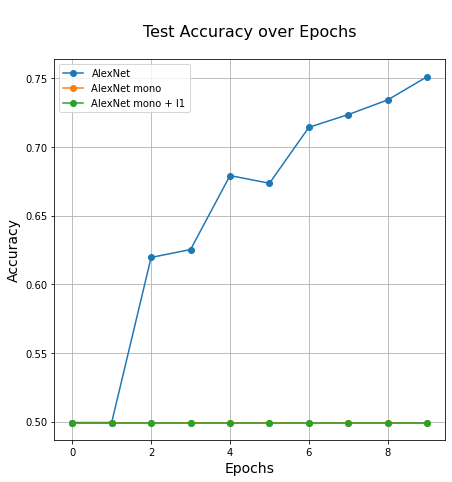

In [56]:
plt.figure(figsize=(7,7))
plt.plot(test_acc, label='AlexNet',marker='o')
plt.plot(test_acc_mono, label='AlexNet mono',marker='o')
plt.plot(test_acc_mono_l1, label='AlexNet mono + l1',marker='o')
plt.title('\nTest Accuracy over Epochs\n',fontsize=16)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.grid()
plt.legend();

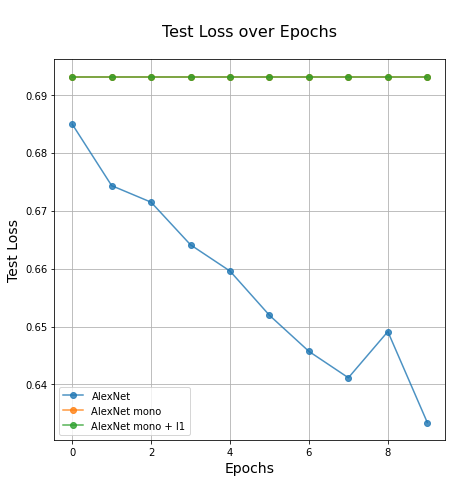

In [57]:
plt.figure(figsize=(7,7))
plt.plot(test_loss, label='AlexNet',marker='o',alpha=0.8)
plt.plot(test_loss_mono, label='AlexNet mono',marker='o',alpha=0.8)
plt.plot(test_loss_mono_l1, label='AlexNet mono + l1',marker='o',alpha=0.8)
plt.title('\nTest Loss over Epochs\n',fontsize=16)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Test Loss',fontsize=14)
plt.grid()
plt.legend();

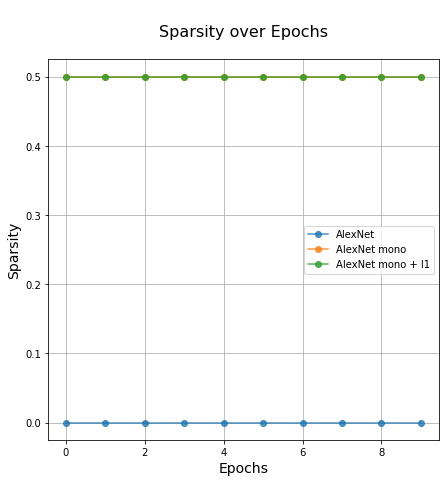

In [58]:
plt.figure(figsize=(7,7))
plt.plot(sparsity, label='AlexNet',marker='o',alpha=0.8)
plt.plot(sparsity_mono, label='AlexNet mono',marker='o',alpha=0.8)
plt.plot(sparsity_mono_l1, label='AlexNet mono + l1',marker='o',alpha=0.8)
plt.title('\nSparsity over Epochs\n',fontsize=16)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Sparsity',fontsize=14)
plt.grid()
plt.legend();

### Sanity check

In [98]:
image_size = 224
def generate_monotone_sequence():
  im1 = np.random.rand(image_size**2 * 3) - .5
  im1 = im1.reshape((3, image_size, image_size))
  im2 = im1 + .1
  im3 = im1 + .2

  batch = np.stack([im1, im2, im3], axis=0)

  return torch.tensor(batch, dtype=torch.float32)

seq = generate_monotone_sequence()

def check_monotonicity(self, input, output):
  is_mono = np.all(np.diff(input[0].cpu().detach().numpy().reshape(3, -1), axis=0) >= 0)
  print(f'Last layer has monotone input: {is_mono}')



In [178]:
# Vanilla AlexNet is not monotone
AlexNetmodel.eval()
handle = AlexNetmodel.classifier[7].register_forward_hook(check_monotonicity)
_ = AlexNetmodel(seq.cuda())
handle.remove()


Last layer has monotone input: False


In [95]:
# Monotone AlexNet is truly monotone
AlexNetmodel_mono.eval()
handle = AlexNetmodel_mono.classifier[7].register_forward_hook(check_monotonicity)
_ = AlexNetmodel_mono(seq.cuda())
handle.remove()

Last layer has monotone input: True


In [96]:
# Monotone AlexNet + l1 is also monotone
AlexNetmodel_mono_l1.eval()
handle = AlexNetmodel_mono_l1.classifier[7].register_forward_hook(check_monotonicity)
_ = AlexNetmodel_mono_l1(seq.cuda())
handle.remove()

Last layer has monotone input: True
